In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from genSinteticData import genData

# EDA

In [72]:
df = genData()
dfSize = df

#dfSize.iloc[:,:-1].head(2)
#Transforming the gender column to numeric
dfSize['genero'] = dfSize['genero'].map(lambda x: 1 if x == 'M' else (0 if x == 'F' else None))
dfSize.head(3)

,altura,peso,idade,genero,tamanho
0,175.0,59.9,41,1,36
1,168.6,67.8,27,1,38
2,176.5,58.1,25,0,38


In [99]:
dfSize.describe()

,altura,peso,idade,genero,tamanho
count,2000.000000,2000.000000,2000.000000,2000.0000,2000.00000
mean,170.451250,69.903750,38.822000,0.5050,39.35900
std,9.883876,15.080031,12.161466,0.5001,2.78424
min,137.600000,24.700000,18.000000,0.0000,36.00000
25%,163.800000,59.400000,28.000000,0.0000,37.00000
50%,170.450000,70.000000,39.000000,1.0000,39.00000
75%,176.825000,80.000000,50.000000,1.0000,41.00000
max,208.500000,128.900000,59.000000,1.0000,50.00000


In [98]:
#listing the man's data
dfSize[dfSize['genero'] == 1]

,altura,peso,idade,genero,tamanho
0,175.0,59.9,41,1,36
1,168.6,67.8,27,1,38
8,165.3,79.9,50,1,39
12,172.4,58.5,29,1,37
13,150.9,55.9,59,1,36
...,...,...,...,...,...
1982,163.7,117.3,39,1,48
1984,179.5,73.6,19,1,40
1988,163.6,98.9,53,1,43
1993,177.1,81.3,42,1,41


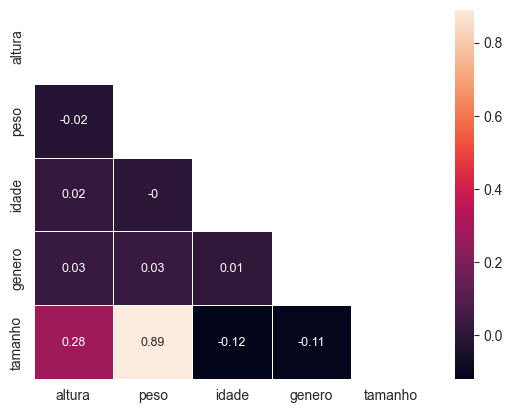

In [70]:
corr_Matrix = dfSize.corr()

def plot_heatmap(corr_matrix):
    mask = np.zeros_like(corr_matrix)
    triangle_indices = np.triu_indices_from(mask)
    mask[triangle_indices] = True

    plt.figure(figsize=(6.4, 4.8))
    sns.heatmap(round(corr_matrix, 2), mask=mask, annot=True, annot_kws={"size": 9}, 
                linewidths=0.5)
    sns.set_style("white")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

plot_heatmap(corr_Matrix)

<Axes: xlabel='altura', ylabel='peso'>

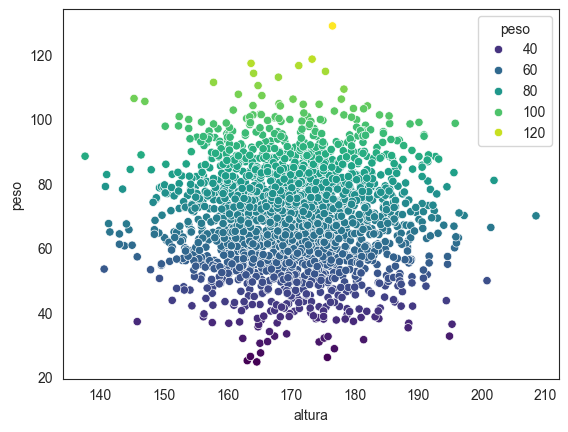

In [100]:
#Plotting Wieght vs Height
sns.scatterplot(data=dfSize, x='altura', y='peso', hue='peso', palette='viridis')

Text(0.5, 1.0, 'Scatter Plot of Weight vs Height')

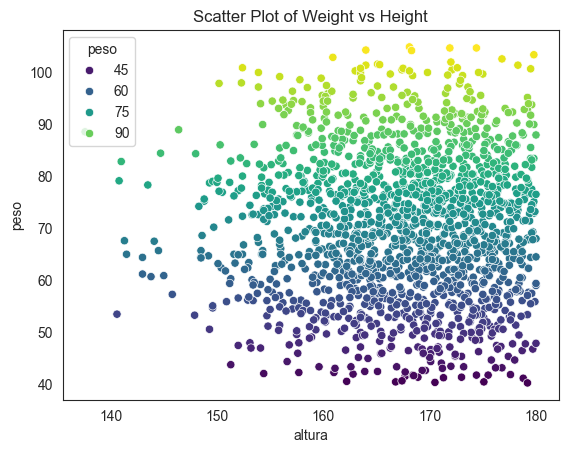

In [113]:
#Limiting Weight and Height
dataFiltered = dfSize[(dfSize['peso'] >= 40) & (dfSize['peso'] <= 105) & (dfSize['altura'] <= 180)]

sns.scatterplot(data=dataFiltered, x='altura', y='peso', hue='peso', palette='viridis')
plt.title('Scatter Plot of Weight vs Height')

# ML PART

In [126]:
X = dataFiltered.iloc[:,:-1]
y = dataFiltered['tamanho']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

RegressionModel = LinearRegression()
RegressionModel.fit(X_train, y_train)
#score with training data
scoreTrain = RegressionModel.score(X_train, y_train)
print("The score of the model with training data is:", round(scoreTrain,2))
#the r2 score of the modl
r2 = r2_score(y_train, RegressionModel.predict(X_train))
print("The r2 score of the model is:", round(r2,2))

The score of the model with training data is: 0.93
The r2 score of the model is: 0.93


In [127]:
scoreTest = RegressionModel.score(X_test, y_test)
print("The score of the model with test data is:", round(scoreTest,2))

#the r2 score of the modl
r2 = r2_score(y_test, RegressionModel.predict(X_test))
print("The r2 score of the model is:", round(r2,2))

The score of the model with test data is: 0.94
The r2 score of the model is: 0.94


In [130]:
# Predicting the size
newUserDimensions = [175, 65, 41, 1]

newUserDimensions = pd.DataFrame([newUserDimensions], columns=X.columns)
y_pred = RegressionModel.predict(newUserDimensions)

print(f"There's a chance of {round(scoreTest * 100,)}%, that your size is: {y_pred[0]:.0f}")

There's a chance of 94%, that your size is: 38
